# Import Libraries

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#for preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder , LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

#for evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score , accuracy_score , classification_report,silhouette_score , precision_score


#models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb


import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")




In [80]:
df=pd.read_csv(r'C:\Users\Ahmed Ashraf\Desktop\archive (3)\MBA.csv')
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


In [82]:
df.isna().sum()

application_id       0
gender               0
international        0
gpa                  0
major                0
race              1842
gmat                 0
work_exp             0
work_industry        0
admission         5194
dtype: int64

In [83]:
df['admission'].value_counts()

admission
Admit       900
Waitlist    100
Name: count, dtype: int64

In [84]:
df['admission'] = df['admission'].fillna('Unknown')


In [85]:
df['race'].value_counts()

race
White       1456
Asian       1147
Black        916
Hispanic     596
Other        237
Name: count, dtype: int64

In [86]:
total_rows = len(df)
missing_percentage = (df['race'].isnull().sum() / total_rows) * 100
print(f"Missing values percentage: {missing_percentage:.2f}%")


Missing values percentage: 29.74%


In [87]:
df['race']=df['race'].fillna('Unknown')

In [88]:
df.isna().sum()

application_id    0
gender            0
international     0
gpa               0
major             0
race              0
gmat              0
work_exp          0
work_industry     0
admission         0
dtype: int64

In [89]:
le=LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col]=le.fit_transform(df[col])

In [90]:
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,0,False,3.30,0,0,620.0,3.0,3,0
1,2,1,False,3.28,1,1,680.0,5.0,6,1
2,3,0,True,3.30,0,4,710.0,5.0,13,0
3,4,1,False,3.47,2,1,690.0,6.0,13,1
4,5,1,False,3.35,2,2,590.0,5.0,1,1


In [91]:
df['international'] = df['international'].astype(int)


In [92]:
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,0,0,3.30,0,0,620.0,3.0,3,0
1,2,1,0,3.28,1,1,680.0,5.0,6,1
2,3,0,1,3.30,0,4,710.0,5.0,13,0
3,4,1,0,3.47,2,1,690.0,6.0,13,1
4,5,1,0,3.35,2,2,590.0,5.0,1,1


# Split Data into Train & Test

In [93]:
x=df.drop(['application_id' , 'admission'] , axis=1)
y=df['admission']

In [94]:
print(y.dtype)


int32


In [95]:
x_train , x_test , y_train , y_test =train_test_split(x , y , test_size=0.2 , random_state=42)

In [96]:
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)


Train set: (4955, 8) (4955,)
Test set: (1239, 8) (1239,)


In [97]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

# Build and Evaluate Different Models

In [98]:
models ={
    'Logistic_Regression':LogisticRegression(),
    'Gauss_NB':GaussianNB(),
    'KNN':KNeighborsClassifier(),
    'Random_Forest_Classifier':RandomForestClassifier(),
    'XGBoost':xgb.XGBClassifier(),
    'svc':SVC()
}

In [100]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dictionary to store results
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}

# Evaluate each model
for i in models:
    obj = models[i]
    obj.fit(x_train, y_train)
    obj_pred = obj.predict(x_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, obj_pred)
    precision = precision_score(y_test, obj_pred, average='macro')  # Change to 'macro', 'micro', or 'weighted'
    recall = recall_score(y_test, obj_pred, average='macro')        # Change to 'macro', 'micro', or 'weighted'
    f1 = f1_score(y_test, obj_pred , average='macro')

    # Store results in the dictionary
    results['Model'].append(i)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results in a table
print(results_df)


                      Model  Accuracy  Precision    Recall  F1-Score
0       Logistic_Regression  0.829701   0.454577  0.365945  0.365691
1                  Gauss_NB  0.827280   0.450854  0.410360  0.420895
2                       KNN  0.825666   0.443248  0.395955  0.405234
3  Random_Forest_Classifier  0.815981   0.420896  0.379673  0.385094
4                   XGBoost  0.816788   0.431659  0.395129  0.403416
5                       svc  0.827280   0.275760  0.333333  0.301826


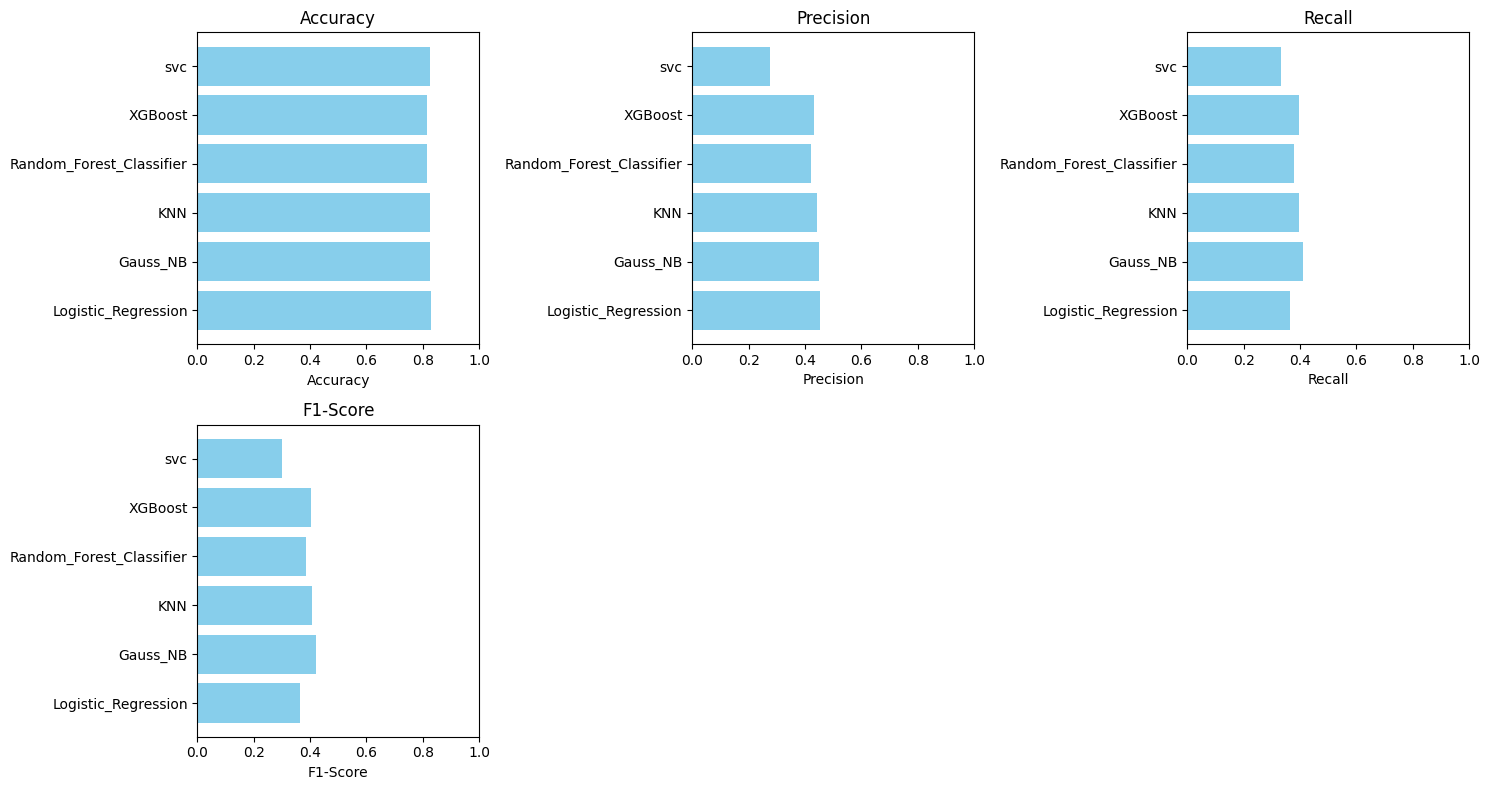

In [101]:
# Plotting each metric
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

plt.figure(figsize=(15, 8))

for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i + 1)
    plt.barh(results_df['Model'], results_df[metric], color='skyblue')
    plt.title(metric)
    plt.xlim(0, 1)
    plt.xlabel(metric)

plt.tight_layout()
plt.show()
